# I. Data Preprocessing

In [2]:
# Read the CSV file
import pandas as pd
df = pd.read_csv("data/data.csv")

## 1. Data cleaning
### 1) Row ID

In [3]:
df.iloc[:, 0]

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

In [4]:
# Split the first column into three new columns
df[['second_no', 'version', 'pid']] = df.iloc[:, 0].str.split('.', expand=True)

# Extract the numeric parts and replace X and V directly
df['second_no'] = df['second_no'].str.extract('(\d+)').astype(int)  # Replace X with its numeric part
df['version'] = df['version'].str.extract('(\d+)').astype(int)  # Replace V with its numeric part
# Convert the 'num' column to integer for sorting
# Fill None values in 'num' with a default value (e.g., 0)
df['pid'] = df['pid'].fillna(0).astype(int)
# Rename the 'Unnamed: 0' column to 'id'
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Reorder the columns to move num, X, V between id and X1
df = df[['id', 'pid', 'second_no', 'version', 'X1'] + [col for col in df.columns if col not in ['id', 'pid', 'second_no', 'version', 'X1']]]

# Sort the DataFrame by the 'num' column
df_sorted = df.sort_values(by=['version', 'pid', 'second_no'])

# Display the sorted DataFrame
df_sorted.head(50)

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
9065,X1.V1,0,1,1,12,22,35,45,69,74,...,-18,-32,-47,-53,-48,-40,-17,-23,-32,5
9699,X2.V1,0,2,1,-41,-50,-53,-49,-35,-28,...,34,22,4,-18,-31,-27,-26,-21,-30,5
2988,X3.V1,0,3,1,-45,-60,-73,-70,-70,-51,...,1,-21,-38,-44,-31,-17,4,35,59,5
3227,X4.V1,0,4,1,68,63,52,45,46,45,...,-22,-47,-68,-85,-92,-96,-83,-73,-66,5
8967,X5.V1,0,5,1,-59,-48,-35,-22,4,18,...,4,-5,-16,-29,-35,-21,3,35,66,5
7494,X6.V1,0,6,1,92,97,86,67,38,3,...,-25,-13,-2,-15,-27,-44,-40,-21,3,5
6756,X7.V1,0,7,1,14,10,7,-14,-49,-88,...,41,48,39,27,17,17,21,30,43,5
1702,X8.V1,0,8,1,50,63,69,72,84,93,...,42,30,16,3,-17,-24,-20,-14,-27,5
10720,X9.V1,0,9,1,-24,-25,-22,-16,-10,-9,...,-2,0,-3,-18,-36,-41,-39,-30,-17,5
4706,X10.V1,0,10,1,-14,-19,-30,-33,-31,-28,...,9,11,17,39,54,54,34,29,31,5


Here we can see that:
- pid (X): participant number
- second_no: the second number (23 seconds per patient)
- version (V): the version of the data
- 178 columns stands for the 178 samples within one second

Except for Version 1, We found 4 different versions (11,12,13,14), each of the version has 23 rows of data. 

In [5]:
df['version'].unique()

array([ 1, 14, 12, 13, 11])

In [6]:
df[df['version'] != 1].sort_values(by=['version', 'pid', 'second_no']).head(50)

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
3841,X1.V11,0,1,11,-24,-22,-17,-18,-19,-14,...,33,46,36,31,33,37,45,33,20,4
7371,X2.V11,0,2,11,-1,-19,-30,-29,-33,-29,...,-59,-41,-19,18,37,40,32,27,10,4
11434,X3.V11,0,3,11,-11,-35,-64,-81,-90,-71,...,26,31,39,46,46,48,48,54,46,4
5149,X4.V11,0,4,11,54,43,38,18,-8,-27,...,-31,-17,-27,-28,-44,-27,2,19,26,4
7813,X5.V11,0,5,11,17,6,-10,-21,-31,-44,...,-97,-81,-64,-32,4,20,18,17,19,4
9833,X6.V11,0,6,11,17,25,36,48,48,38,...,74,69,85,88,84,68,57,52,57,4
6859,X7.V11,0,7,11,64,82,93,89,78,69,...,12,10,7,-6,-40,-74,-89,-103,-107,4
6872,X8.V11,0,8,11,-102,-96,-81,-57,-23,-8,...,-18,-1,-3,-18,-43,-59,-64,-65,-67,4
2238,X9.V11,0,9,11,-50,-43,-37,-46,-75,-84,...,100,91,65,14,-13,-36,-40,-19,17,4
3920,X10.V11,0,10,11,51,79,94,97,108,114,...,-68,-56,-31,-5,-5,-3,3,16,12,4


Therefore, we will assign a unique participant id to each of these versions, and unify the version to 1.

In [7]:
# Find the maximum existing pid
max_pid = df['pid'].max()
# Identify unique versions that are not 1
versions_with_empty_pid = df[df['version'] != 1]['version'].unique()
# Assign a unique pid to each participant and unify the version to 1
for i, version in enumerate(versions_with_empty_pid):
    new_pid = max_pid + i + 1  # Start from max_pid + 1
    df.loc[(df['version'] == version), 'pid'] = new_pid
    df.loc[(df['version'] == version), 'version'] = 1

print (f"After data cleaning:")
print (f"There are {len(df['pid'].unique())} patients")
print (f"There are {len(df['second_no'].unique())} seconds per patient")
print (f"There are {len(df['version'].unique())} versions") 

After data cleaning:
There are 500 patients
There are 23 seconds per patient
There are 1 versions


### 2) Label
Kaggle dataset description: 
"5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest."

So we convert 2-5 to 0: Non-seizure, and 1: Seizure

In [8]:
# Binary classification: 1: Seizure, 0: Non-seizure
# Change y value to 0 if y != 1
df['y'] = df['y'].apply(lambda x: 0 if x != 1 else x)

In [9]:
X = df.drop(columns=['pid', 'second_no', 'version', 'id', 'y'])  # Features
y = df['y']  # Target variable

# II. Making the test cases harder

Since this dataset is highly imbalanced: (80% non-seizure, 20% seizure), we will generate hard test cases to test the robustness of this model. 

Training details: To compare the results for different methods, we will limit:
1. Models: SVM(rbf kernel) and ANN;
2. Data: second-level data without temporal consideration;
3. Features: Total 178 data points;
4. Metrics: precision, recall, f1(weighted), accuracy, and cohen kappa.

## 0. Baseline

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

def evaluate_classification_metrics(y_true, y_pred, y_pred_prob):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    if len(set(y_true)) > 1:
        # Check if ROC-AUC can be calculated (i.e., both classes are present)
        roc_auc = roc_auc_score(y_true, y_pred_prob)
        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_true, y_pred)
    else:
        roc_auc = None  # Not computable, only one class in y_true
        kappa = None
    
    # Calculate metrics for seizure class (y_label=1)
    precision_seizure = precision_score(y_true, y_pred, pos_label=1)
    recall_seizure = recall_score(y_true, y_pred, pos_label=1)
    f1_seizure = f1_score(y_true, y_pred, pos_label=1)
    
    # Calculate metrics for non-seizure class (y_label=0)
    precision_non_seizure = precision_score(y_true, y_pred, pos_label=0)
    recall_non_seizure = recall_score(y_true, y_pred, pos_label=0)
    f1_non_seizure = f1_score(y_true, y_pred, pos_label=0)
    
    print(f'\nSeizure (y=1):')
    print(f'  Precision: {precision_seizure * 100:.2f} %')
    print(f'  Recall: {recall_seizure * 100:.2f} %')
    print(f'  F1 Score: {f1_seizure * 100:.2f} %')
    
    print(f'\nNon-Seizure (y=0):')
    print(f'  Precision: {precision_non_seizure * 100:.2f} %')
    print(f'  Recall: {recall_non_seizure * 100:.2f} %')
    print(f'  F1 Score: {f1_non_seizure * 100:.2f} %')
    
    # Print metrics
    print(f'\nOverall:')
    print(f'  Accuracy: {accuracy * 100:.2f} %')
    print(f'  Precision: {precision * 100:.2f} %')
    print(f'  Recall: {recall * 100:.2f} %')
    print(f'  F1 Score: {f1 * 100:.2f} %')
    if roc_auc is not None:
        print(f'  ROC-AUC: {roc_auc * 100:.2f} %')
    if kappa is not None:
        print(f'  Cohen\'s Kappa: {kappa * 100:.2f} %')

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### SVM

In [37]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 97.66 %
  Recall: 90.06 %
  F1 Score: 93.71 %

Non-Seizure (y=0):
  Precision: 97.54 %
  Recall: 99.46 %
  F1 Score: 98.49 %

Overall:
  Accuracy: 97.57 %
  Precision: 97.66 %
  Recall: 90.06 %
  F1 Score: 97.53 %
  ROC-AUC: 99.60 %
  Cohen's Kappa: 92.20 %


### ANN

In [25]:
# Importing necessary libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score


# Define the custom Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for binary classification.
    Arguments:
        gamma -- focusing parameter for modulating factor (1-p_t)
        alpha -- balancing factor for classes
    """
    def focal_loss_fixed(y_true, y_pred):
        # Convert y_true to float32 to match y_pred's data type
        y_true = K.cast(y_true, 'float32')
        
        # Clip predictions to prevent log(0)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate cross entropy
        cross_entropy = -y_true * K.log(y_pred)
        # Calculate weight for each example
        weight = alpha * K.pow((1 - y_pred), gamma)
        # Apply focal loss
        loss = weight * cross_entropy
        return K.mean(loss, axis=-1)
    
    return focal_loss_fixed


def ann(X_train, y_train, loss='bce'):
    # Initializing the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu', input_dim=178))
    
    # Adding the second hidden layer
    classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu'))
    
    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compiling the ANN
    if loss == 'bce':
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    elif loss == 'focal_loss':
        classifier.compile(optimizer='adam', loss=focal_loss(gamma=3., alpha=0.5), metrics=['accuracy'])
    else:
        raise Exception("Please identify a loss function!")
    
    # Fitting the ANN to the training set without printing the epoch output
    classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)
    
    return classifier

In [39]:
ann_clf  = ann(X_train, y_train)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

72/72 [==============================] - 0s 280us/step

Seizure (y=1):
  Precision: 92.96 %
  Recall: 88.39 %
  F1 Score: 90.62 %

Non-Seizure (y=0):
  Precision: 97.23 %
  Recall: 98.38 %
  F1 Score: 97.80 %

Overall:
  Accuracy: 96.43 %
  Precision: 92.96 %
  Recall: 88.39 %
  F1 Score: 96.40 %
  ROC-AUC: 98.09 %
  Cohen's Kappa: 88.42 %


## 1. **Train-Test Split with Different Data**

### 1) Balanced test set, imbalanced training set
This setup can simulate how the model would perform in a scenario where it learns from the naturally imbalanced data (reflecting real-world distributions) but is tested in an environment where the two classes are equally represented (to focus on performance without bias toward the majority class).

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separate label 1 and label 0
X_label1 = X[y == 1]
X_label0 = X[y == 0]
y_label1 = y[y == 1]
y_label0 = y[y == 0]

# Step 1: Split label 0 (9200) - Take 1150 examples for test, the rest for training
X_train_label0, X_test_label0, y_train_label0, y_test_label0 = train_test_split(
    X_label0, y_label0, test_size=len(y_label1)//2, random_state=42)

# Step 2: Split label 1 (2300) - Take exactly 1150 examples for the test set
X_train_label1, X_test_label1, y_train_label1, y_test_label1 = train_test_split(
    X_label1, y_label1, test_size=len(y_label1)//2, random_state=42)

# Step 3: Combine the training and testing sets
# Combine label 1 and label 0 data for training set
X_train = np.vstack([X_train_label1, X_train_label0])
y_train = np.hstack([y_train_label1, y_train_label0])

# Combine label 1 and label 0 data for test set (test set will be balanced)
X_test = np.vstack([X_test_label1, X_test_label0])
y_test = np.hstack([y_test_label1, y_test_label0])

# Verify the balance of the test set
print("Test set label distribution:", np.bincount(y_test))
print("Train set label distribution:", np.bincount(y_train))

Test set label distribution: [1150 1150]
Train set label distribution: [8050 1150]


In [48]:
# SVC
from sklearn.svm import SVC
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
metrics_svc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 99.22 %
  Recall: 88.96 %
  F1 Score: 93.81 %

Non-Seizure (y=0):
  Precision: 89.99 %
  Recall: 99.30 %
  F1 Score: 94.42 %

Overall:
  Accuracy: 94.13 %
  Precision: 99.22 %
  Recall: 88.96 %
  F1 Score: 94.11 %
  ROC-AUC: 99.63 %
  Cohen's Kappa: 88.26 %


In [49]:
# ANN
ann_clf  = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

72/72 [==============================] - 0s 290us/step

Seizure (y=1):
  Precision: 99.38 %
  Recall: 83.39 %
  F1 Score: 90.69 %

Non-Seizure (y=0):
  Precision: 85.69 %
  Recall: 99.48 %
  F1 Score: 92.07 %

Overall:
  Accuracy: 91.43 %
  Precision: 99.38 %
  Recall: 83.39 %
  F1 Score: 91.38 %
  ROC-AUC: 95.54 %
  Cohen's Kappa: 82.87 %


### 2) Balanced training set, imbalanced test set
It will allow you to see whether the model, trained on a balanced dataset, can generalize well to an imbalanced situation, which is often what happens in real-world applications. The test set, in this case, acts as a "stress test" for the model. You'll be able to see whether the model, after being trained on a balanced set, overfits or generalizes well when faced with the majority class (non-seizure) during testing.
The true test of the model will be how well it can identify seizure cases in an environment dominated by non-seizure cases.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separate label 1 (seizure) and label 0 (non-seizure)
X_label1 = X[y == 1]
X_label0 = X[y == 0]
y_label1 = y[y == 1]
y_label0 = y[y == 0]

# Step 1: Manually assign 2300 samples from each class for the balanced training set
# (Since train_size=2300 is the full number, we take them all manually)
X_train_label1 = X_label1[:len(y_label1)//2]  # Take all 2300 seizure samples for training
y_train_label1 = y_label1[:len(y_label1)//2]

X_train_label0 = X_label0[:len(y_label1)//2]  # Take 2300 non-seizure samples for training
y_train_label0 = y_label0[:len(y_label1)//2]

# Step 2: The remaining samples will go into the imbalanced test set
X_rest_label1 = X_label1[len(y_label1)//2:]  # Remaining seizure samples
y_rest_label1 = y_label1[len(y_label1)//2:]

X_rest_label0 = X_label0[len(y_label1)//2:]  # Remaining non-seizure samples
y_rest_label0 = y_label0[len(y_label1)//2:]

# Combine training sets to form the balanced training set
X_train = np.vstack([X_train_label1, X_train_label0])
y_train = np.hstack([y_train_label1, y_train_label0])

# Combine the remaining samples to form the imbalanced test set
X_test = np.vstack([X_rest_label1, X_rest_label0])
y_test = np.hstack([y_rest_label1, y_rest_label0])

# Verify class distribution in training and test sets
print("Training set label distribution:", np.bincount(y_train))  # Should be balanced
print("Test set label distribution:", np.bincount(y_test))  # Will be imbalanced


Training set label distribution: [1150 1150]
Test set label distribution: [8050 1150]


In [12]:
# SVC
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
metrics_svc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 81.43 %
  Recall: 93.39 %
  F1 Score: 87.00 %

Non-Seizure (y=0):
  Precision: 99.04 %
  Recall: 96.96 %
  F1 Score: 97.99 %

Overall:
  Accuracy: 96.51 %
  Precision: 81.43 %
  Recall: 93.39 %
  F1 Score: 96.61 %
  ROC-AUC: 99.01 %
  Cohen's Kappa: 84.99 %


In [14]:
# ANN
ann_clf  = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

288/288 [==============================] - 0s 258us/step

Seizure (y=1):
  Precision: 58.78 %
  Recall: 93.39 %
  F1 Score: 72.15 %

Non-Seizure (y=0):
  Precision: 98.97 %
  Recall: 90.65 %
  F1 Score: 94.62 %

Overall:
  Accuracy: 90.99 %
  Precision: 58.78 %
  Recall: 93.39 %
  F1 Score: 91.82 %
  ROC-AUC: 96.37 %
  Cohen's Kappa: 67.11 %


## 2. Hard test cases 

### 1) Points within support vectors
- Support vectors are the data points that lie closest to the decision boundary. These points have the highest influence on determining the position of the boundary.
- These points are from training data.

In [55]:
from sklearn.model_selection import train_test_split

def training_points_within_support_vectors():
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC(class_weight='balanced', probability=True)
    clf.fit(X_train, y_train)
    # Get the indices and support vectors from the training data
    support_vectors_indices = clf.support_
    support_vectors = clf.support_vectors_
    X_support_vectors = X_train.iloc[support_vectors_indices]
    y_support_vectors = y_train.iloc[support_vectors_indices]

    if DEBUG:
        print ("--------------------training_points_within_support_vectors--------------------")
        y_pred_within_support_vectors = clf.predict(support_vectors)
        y_pred_prob_within_support_vectors = clf.decision_function(support_vectors)
        evaluate_classification_metrics(y_support_vectors, y_pred_within_support_vectors, y_pred_prob_within_support_vectors)
        
    return X_support_vectors, y_support_vectors

In [56]:
# Get the actual training labels for the support vectors
X_support_vectors, y_support_vectors = training_points_within_support_vectors()
print(f"Number of points near the decision boundary (support vectors): {y_support_vectors.shape[0]}")
print("Label distribution in points near the decision boundary (actual labels)", y_support_vectors.value_counts())    

/Library/Python/3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Library/Python/3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



Seizure (y=1):
  Precision: 64.71 %
  Recall: 87.68 %
  F1 Score: 74.46 %

Non-Seizure (y=0):
  Precision: 95.41 %
  Recall: 84.27 %
  F1 Score: 89.49 %

Overall:
  Accuracy: 85.11 %
  Precision: 64.71 %
  Recall: 87.68 %
  F1 Score: 85.77 %
  ROC-AUC: 88.04 %
  Cohen's Kappa: 64.29 %
Number of points near the decision boundary (support vectors): 1115
Label distribution in points near the decision boundary (actual labels) y
0    839
1    276
Name: count, dtype: int64


### 2) Points close to the decision boundary 


#### SVM
- Points within a distance to the hyperplanes
- Points are from the test data

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score

def test_points_near_decision_boundary_svm():
    distance_threshold = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC(class_weight='balanced', probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Get the decision function (distance from the decision boundary)
    decision_distances = clf.decision_function(X_test)
    # Find the cases where the absolute value of the distance is close to 0 (i.e., near the boundary)
    boundary_cases = np.where(np.abs(decision_distances) < distance_threshold)[0]  # Adjust the threshold as needed
    
    # Get the vectors and labels near the decision boundary
    X_near_boundary = X_test.iloc[boundary_cases]
    y_near_boundary = y_test.iloc[boundary_cases]
    y_pred_near_boundary = y_pred[boundary_cases]
    decision_distances_near_boundary = decision_distances[boundary_cases]  # Filter decision distances
    
    if DEBUG:
        print ("--------------------test_points_near_decision_boundary_svm--------------------\n")
        evaluate_classification_metrics(y_near_boundary, y_pred_near_boundary, decision_distances_near_boundary)
    return X_near_boundary, y_near_boundary

In [46]:
X_near_boundary, y_near_boundary = test_points_near_decision_boundary_svm()
print(f"Number of points near the decision boundary: {y_near_boundary.shape[0]}")
print(f"Label distribution in points near the decision boundary (actual labels):{pd.Series(y_near_boundary).value_counts()}")


Seizure (y=1):
  Precision: 60.71 %
  Recall: 60.71 %
  F1 Score: 60.71 %

Non-Seizure (y=0):
  Precision: 64.52 %
  Recall: 64.52 %
  F1 Score: 64.52 %

Overall:
  Accuracy: 62.71 %
  Precision: 60.71 %
  Recall: 60.71 %
  F1 Score: 62.71 %
  ROC-AUC: 74.31 %
  Cohen's Kappa: 25.23 %
Number of points near the decision boundary: 59
Label distribution in error cases (actual labels):y
0    31
1    28
Name: count, dtype: int64


#### ANN
- Get points where the predicted probability is near the decision threshold (e.g., near 0.5).

In [51]:
def test_points_near_decision_boundary_ann():
    """
    Get points where the predicted probability is near the decision threshold (e.g., near 0.5).
    For ANN, we check how close the probabilities are to the threshold.
    
    Args:
    - X_test: Features from the test set
    - y_test: True labels for the test set
    - y_pred: Binary predictions from the model
    - decision_probabilities: Predicted probabilities from the model
    - threshold: The decision threshold (default is 0.5)
    - distance_threshold: How close a probability needs to be to the threshold to be considered "near"
    """
    distance_threshold = 0.4
    # Find the cases where the predicted probabilities are near the threshold (e.g., near 0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ann_clf = ann(X_train, y_train)  # Replace with your ANN training
    y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int).ravel()  # Binary predictions
    boundary_cases = np.where(np.abs(y_pred_prob - 0.5) < distance_threshold)[0]
    
    # Get the vectors and labels near the threshold
    X_near_boundary = X_test.iloc[boundary_cases] if hasattr(X_test, 'iloc') else X_test[boundary_cases]
    y_near_boundary = y_test.iloc[boundary_cases] if hasattr(y_test, 'iloc') else y_test[boundary_cases]
    y_pred_near_boundary = y_pred[boundary_cases]
    decision_prob_near_boundary = y_pred_prob[boundary_cases]
    
    if DEBUG:
        print ("--------------------test_points_near_decision_boundary_ann--------------------\n")
        evaluate_classification_metrics(y_near_boundary, y_pred_near_boundary, decision_prob_near_boundary)
    return X_near_boundary, y_near_boundary

In [52]:
X_near_boundary, y_near_boundary = test_points_near_decision_boundary_ann()
print(f"Number of points near the decision boundary: {y_near_boundary.shape[0]}")
print(f"Label distribution in points near the decision boundary (actual labels):{pd.Series(y_near_boundary).value_counts()}")

72/72 [==============================] - 0s 325us/step

Seizure (y=1):
  Precision: 65.38 %
  Recall: 42.50 %
  F1 Score: 51.52 %

Non-Seizure (y=0):
  Precision: 45.24 %
  Recall: 67.86 %
  F1 Score: 54.29 %

Overall:
  Accuracy: 52.94 %
  Precision: 65.38 %
  Recall: 42.50 %
  F1 Score: 52.66 %
  ROC-AUC: 58.30 %
  Cohen's Kappa: 9.63 %
Number of points near the decision boundary: 68
Label distribution in error cases (actual labels):y
1    40
0    28
Name: count, dtype: int64


### 3) Misclassified Points 


In [22]:
DEBUG = True

def get_error_points(X_test, y_test, y_pred, y_pred_prob):
    # Step 1: Identify error cases (misclassified points)
    error_mask = y_test != y_pred
    X_error = X_test[error_mask]
    y_error_true = y_test[error_mask]
    y_error_pred = y_pred[error_mask]
    y_error_prob = y_pred_prob[error_mask]
    
    if DEBUG:
        evaluate_classification_metrics(y_error_true, y_error_pred, y_error_prob)
        
    return X_error, y_error_true

#### SVM

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def misclassified_test_points_svm():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC(class_weight='balanced', probability=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.decision_function(X_test)
    X_error, y_error = get_error_points(X_test, y_test, y_pred, y_pred_prob)
    if DEBUG:
        print ("--------------------misclassified_test_points_svm--------------------\n")
    return X_error, y_error

X_error, y_error = misclassified_test_points_svm()
print(f"\nNumber of error cases: {len(y_error)}")
print(f"Label distribution in error cases (actual labels):{pd.Series(y_error).value_counts()}")


Seizure (y=1):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Non-Seizure (y=0):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Overall:
  Accuracy: 0.00 %
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %
  ROC-AUC: 0.00 %
  Cohen's Kappa: -63.60 %

Number of error cases: 53
Label distribution in error cases (actual labels):y
0    39
1    14
Name: count, dtype: int64


#### ANN

In [27]:
from sklearn.model_selection import train_test_split

def misclassified_test_points_ann():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ann_clf = ann(X_train, y_train)
    y_pred_prob = ann_clf.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).ravel()
    X_error, y_error = get_error_points(X_test, y_test, y_pred, y_pred_prob)
    if DEBUG:
        print ("--------------------misclassified_test_points_ann--------------------\n")
    return X_error, y_error

X_error, y_error = misclassified_test_points_ann()
print(f"\nNumber of error cases: {len(y_error)}")
print(f"Label distribution in error cases (actual labels):{pd.Series(y_error).value_counts()}")

72/72 [==============================] - 0s 276us/step

Seizure (y=1):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Non-Seizure (y=0):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Overall:
  Accuracy: 0.00 %
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %
  ROC-AUC: 0.00 %
  Cohen's Kappa: -57.35 %

Number of error cases: 121
Label distribution in error cases (actual labels):y
1    92
0    29
Name: count, dtype: int64


### 4) Distinct patients

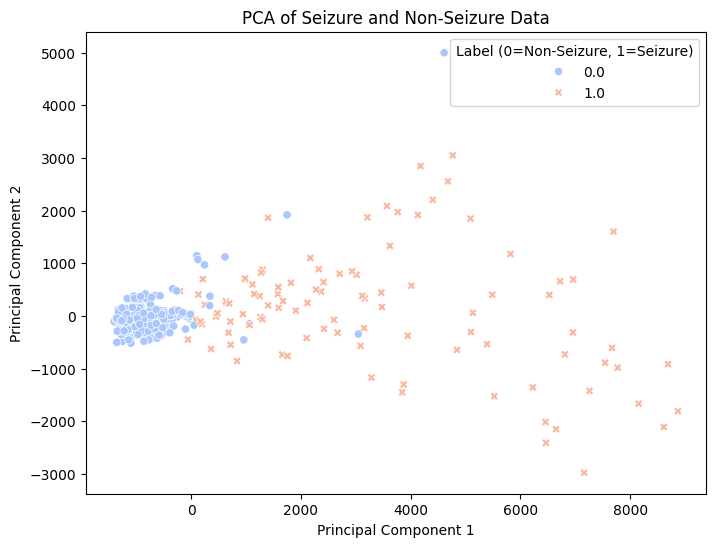

Variance explained by PCA Component 1: 4058974.43
Variance explained by PCA Component 2: 336480.35
Explained variance ratio of PCA components: [0.85463066 0.07084706]


In [89]:
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract statistical features for each second (row) in the DataFrame
# Assuming df has columns from 'X1' to 'X178', and 'pid' and 'y' as participant and label respectively
statistical_features = df.loc[:, 'X1':'X178'].agg(['min', 'max', 'median', 'mean', 'std', 'skew', 'kurtosis'], axis=1)

# Step 2: Add 'pid' and 'y' columns to the statistical features DataFrame
df_with_stats = pd.concat([df[['pid', 'y']].reset_index(drop=True), statistical_features.reset_index(drop=True)], axis=1)

# Step 3: Group by 'pid' to combine all 23 seconds of data for each participant into one row
# We will concatenate 7 features for each of the 23 seconds, resulting in 161 features per participant
def concatenate_features(group):
    # Concatenate features for all seconds into one list
    combined_features = group.iloc[:, 2:].values.flatten()  # Exclude 'pid' and 'y'
    pid = group['pid'].iloc[0] 
    label = group['y'].iloc[0]  # The label should be the same for all rows of the same pid
    return pd.Series(np.concatenate([combined_features, [label]]))

# Apply the concatenation for each participant (pid)
combined_df = df_with_stats.groupby('pid').apply(concatenate_features)

# Rename columns to reflect the new feature structure
feature_columns = [f'feature_{i+1}' for i in range(combined_df.shape[1] - 2)]  # Feature columns
combined_df.columns = feature_columns + ['pid', 'label']  # Adding 'pid' and 'label'

# Step 4: Perform PCA to reduce 161 features to 2 features
X = combined_df.iloc[:, :-2].values  # All feature columns
y = combined_df['label'].values  # Labels (non-seizure/seizure)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 5: Visualize the 2 features with different colors for labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', style=y)
plt.title('PCA of Seizure and Non-Seizure Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label (0=Non-Seizure, 1=Seizure)')
plt.show()

# Step 6: Quantitative metrics on variation
# Calculating variance between individuals
variance = np.var(X_pca, axis=0)
print(f"Variance explained by PCA Component 1: {variance[0]:.2f}")
print(f"Variance explained by PCA Component 2: {variance[1]:.2f}")

# Optional: Print explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of PCA components: {explained_variance_ratio}")


In [98]:
from scipy.spatial.distance import euclidean

# Step 5: Compute the centroid of the PCA-transformed data
centroid = np.mean(X_pca, axis=0)

# Step 6: Compute Euclidean distance of each participant from the centroid
distances = np.array([euclidean(row, centroid) for row in X_pca])

# Step 7: Set a threshold to identify outliers (e.g., top 5% with highest distance)
threshold = np.percentile(distances, 90)  # Top 5% are considered distinct
outliers = combined_df[distances > threshold]

# Print out the PIDs and labels of outliers
print(f"Participants with distinct behavior (top 5% based on PCA distance):")
print(outliers[['pid', 'label']])

Participants with distinct behavior (top 5% based on PCA distance):
          pid  label
pid                 
104  1.250951    1.0
116  0.593233    1.0
117 -0.342965    1.0
124 -0.919183    1.0
164 -0.352596    1.0
184 -0.333980    1.0
216  1.106548    1.0
234 -0.309741    1.0
244  0.566907    1.0
264  0.351424    1.0
274 -1.024647    1.0
294  0.721955    1.0
324  0.317635    1.0
334  0.637745    1.0
344 -0.717574    1.0
364  2.602717    1.0
404 -0.659542    1.0
416 -1.154109    1.0
417 -0.560452    1.0
434 -0.074955    1.0
454  0.696912    1.0
464  0.921288    1.0
484  0.167622    1.0
517  0.260732    1.0
574  1.232750    1.0
584 -0.827808    1.0
593 -0.420974    0.0
594  1.703288    1.0
616  2.065898    1.0
644 -0.697702    1.0
664 -0.235938    1.0
674  1.732178    1.0
716 -0.656863    1.0
724  0.701475    1.0
754  0.161214    1.0
784 -0.094586    1.0
794 -1.088221    1.0
804  2.025129    1.0
814  4.644703    0.0
816  0.439009    1.0
817 -1.259711    1.0
844  1.297810    1.0
864  0.0

In [99]:
outliers[outliers['label'] == 0]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,pid,label
pid,,,,,,,,,,,,,,,,,,,,,
593,-609.0,380.0,-181.5,-91.662921,240.766359,0.257825,-1.033126,-440.0,337.0,-92.5,...,-0.056627,-0.475104,-906.0,767.0,-86.5,-18.668539,375.396946,0.373438,-0.420974,0.0
814,-425.0,41.0,-216.5,-176.696629,118.441709,0.482446,-0.872801,-126.0,2047.0,41.0,...,2.501630,5.918843,-319.0,2047.0,-23.0,127.084270,541.484253,2.246827,4.644703,0.0


### Function to get hard test cases

In [98]:
DEBUG = False

def get_hard_test_cases(method_list):
    total_test_data = []
    for method in method_list:
        result = eval(method + '()')
        # Get hard test data
        if isinstance(result, tuple):
            X_test, y_test = result
            y_test = pd.Series(y_test, name='y')
            combined_df = pd.concat([X_test, y_test], axis=1)
        total_test_data.append(combined_df)
        total_test_data_df = pd.concat(total_test_data)
        # Drop duplicate rows
        hard_test_df_cleaned = total_test_data_df.drop_duplicates()
        print ("Number of hard test cases:", hard_test_df_cleaned.shape[0])
        print ("Distribution of label: ", hard_test_df_cleaned['y'].value_counts())
        # Get training data
        train_data = df[~df.index.isin(hard_test_df_cleaned.index)].drop(columns=['id', 'pid', 'second_no', 'version'])
        
        return train_data, hard_test_df_cleaned

In [99]:
method_list = ["training_points_within_support_vectors",
               "test_points_near_decision_boundary_svm",
               "test_points_near_decision_boundary_ann",
               "misclassified_test_points_svm",
               "misclassified_test_points_ann"]
train_data, test_data = get_hard_test_cases(method_list)
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

Number of hard test cases: 1112
Distribution of label:  y
0    840
1    272
Name: count, dtype: int64


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the train and test data
train_data = pd.read_csv('hard_test_cases/train.csv')
test_data = pd.read_csv('hard_test_cases/test.csv')

# Step 2: Split the data into features (X) and labels (y)
# Assuming that the label column is named 'target' and all other columns are features
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Step 3: Train the SVM model
svm_model = SVC(kernel='rbf')  # You can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: Get more detailed classification metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.6790
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       840
           1       0.08      0.03      0.04       272

    accuracy                           0.68      1112
   macro avg       0.41      0.46      0.43      1112
weighted avg       0.58      0.68      0.62      1112

